## Финальное соревнование

##### Автор: [Радослав Нейчев](https://www.linkedin.com/in/radoslav-neychev/), @neychev

В данном задании вас ждет неизвестная зависимость. Ваша основная задача: **построить две лучших модели**, минимизирующих среднеквадратичную ошибку (MSE):
1. На первую модель не налагается ограничений.
2. Вторая модель должна быть **линейной**, т.е. представлять собой линейную комбинацию признаков плюс свободный член: $\boldsymbol{w}^{\top}\boldsymbol{x} + b$. При этом __вы можете использовать базовые математические операции для преобразования признаков__: np.exp, np.log, np.pow (полный список доступен в [документации](https://numpy.org/doc/stable/reference/routines.math.html)), а также линейные операции над ними (сумма, умножение на число и пр.). Для преобразования признаков вам будет необходимо написать функцию `my_transformation`. __Кол-во параметров (весов) используемых второй моделью не должно превышать 15 (включая свободный член).__

Настоятельно рекомендуем написать код "с нуля", лишь поглядывая на готовые примеры, а не просто "скопировать-вставить". Это поможет вам в будущем писать код более уверенно

In [110]:
import os
import json

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Загрузка данных происходит ниже. Если она не срабатывает, самостоятельно скачайте файл `hw_final_open_data.npy` и положите его в ту же директорию, что и ноутбук.

In [92]:
# !wget https://raw.githubusercontent.com/girafe-ai/ml-course/23f_yandex_ml_trainings/homeworks/assignment_final/hw_final_open_data.npy -O hw_final_open_data.npy
# !wget https://raw.githubusercontent.com/girafe-ai/ml-course/23f_yandex_ml_trainings/homeworks/assignment_final/hw_final_open_target.npy -O hw_final_open_target.npy

In [133]:
assert os.path.exists('hw_final_open_data.npy'), 'Please, download `hw_final_open_data.npy` and place it in the working directory'
assert os.path.exists('hw_final_open_target.npy'), 'Please, download `hw_final_open_target.npy` and place it in the working directory'
data = np.load('hw_final_open_data.npy', allow_pickle=False)
target = np.load('hw_final_open_target.npy', allow_pickle=False)

In [126]:
def get_df(X):
    columns = [f"f_{i}" for i in range(X.shape[1])]
    df = pd.DataFrame(X, columns=columns)
    return df

In [ ]:
try:
    

In [141]:
scaler = StandardScaler()

X = scaler.transform([123, 123])

def transform_and_scale(X, fit_scaler=True):
    X = X[:, [0, 1, 3, 4, 5]]
    if fit_scaler:
        scaler.fit(X)
    X = scaler.transform(X)
    return X

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [128]:
data_scaled = transform_and_scale(data)

data_df = get_df(data_scaled)
data_df["target"] = target

In [140]:
data_df

,f_0,f_1,f_2,f_3,f_4,target
0,-1.756850,-1.337819,-1.470987,-1.660514,-1.362547,0.382870
1,-0.242356,-0.601022,-0.518101,-0.357012,-0.587032,2.742402
2,1.093615,1.416037,1.339837,1.197407,1.403005,7.239643
3,0.555047,0.342000,0.420964,0.514685,0.357320,4.731191
4,-0.811037,-0.986352,-0.972687,-0.893803,-0.985643,1.317211
...,...,...,...,...,...,...
795,-0.301560,-0.649870,-0.572468,-0.415929,-0.637004,2.403090
796,-1.877984,-1.366118,-1.517798,-1.748970,-1.393870,0.116159
797,0.818543,0.810505,0.835882,0.838276,0.816400,5.261471
798,0.448376,0.178525,0.269698,0.389032,0.195822,4.034624


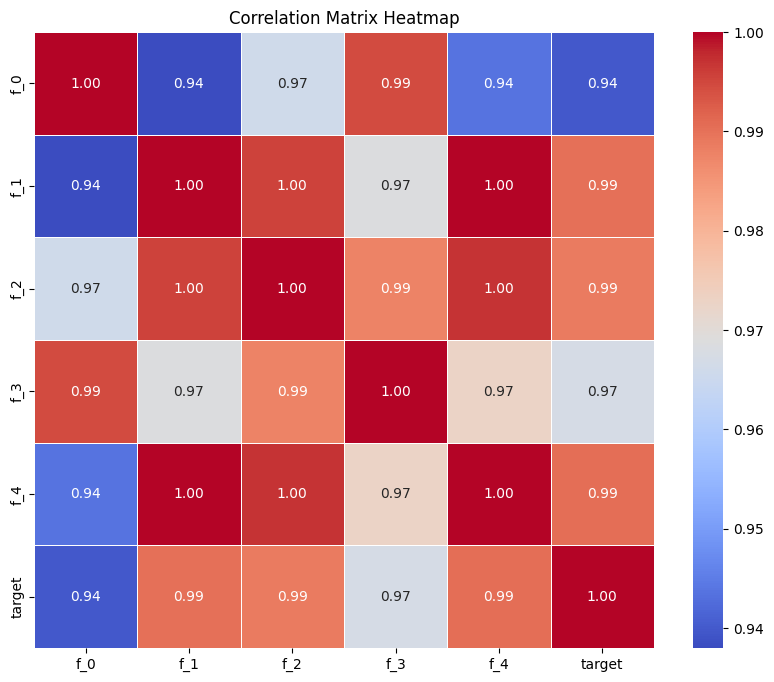

In [130]:
correlation_matrix = data_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Разбивка на `train` и `val` опциональна и сделана для вашего удобства.

In [134]:
train_x, valid_x, train_y, valid_y = train_test_split(data, target, test_size=0.3)

### Модель №1
Напоминаем, в первой части задания ваша основная задача – получить наилучший результат без ограничений на модель. Сдаваться будут только предсказания модели.

Пример с использованием Random Forest доступен ниже.

In [74]:
rf = RandomForestRegressor()
rf.fit(train_x, train_y)

print(
    f'train mse =\t {mean_squared_error(np.round(rf.predict(train_x), 2), np.round(train_y)):.5f}',
    f'validation mse = {mean_squared_error(np.round(rf.predict(valid_x)), np.round(valid_y)):.5f}',
    sep='\n'
)

train mse =	 0.10557
validation mse = 0.30833


##### Сдача первой части соревнования
Загрузите файл `hw_final_closed_data.npy` (ссылка есть на странице с заданием). Если вы используете sklearn-совместимую модель, для генерации посылки вы можете воспользоваться функцией `get_predictions`. В ином случае перепишите функцию для вашей модели и запустите код под следующей ячейкой для генерации посылки.

In [25]:
# !wget https://raw.githubusercontent.com/girafe-ai/ml-course/23f_yandex_ml_trainings/homeworks/assignment_final/hw_final_closed_data.npy -O hw_final_closed_data.npy

In [75]:
assert os.path.exists('hw_final_closed_data.npy'), 'Please, download `hw_final_closed_data.npy` and place it in the working directory'
closed_data = np.load('hw_final_closed_data.npy', allow_pickle=False)

Если необходимо, преобразуйте данные. Преобразованную матрицу объект-признак сохраните в переменную `closed_data`.

In [76]:
closed_data = transform_and_scale(closed_data, False)

In [77]:
def get_predictions(model, eval_data, step=10):
    predicted_values = model.predict(eval_data)
    return predicted_values

Обращаем ваше внимание, предсказания округляются до сотых!

In [78]:
predicted_values = np.round(get_predictions(model=rf, eval_data=closed_data), 2)

assert predicted_values.shape == (closed_data.shape[0], ) # predictions should be just one-dimensional array

In [79]:
# do not change the code in the block below
# __________start of block__________
def float_list_to_comma_separated_str(_list):
    _list = list(np.round(np.array(_list), 2))
    return ','.join([str(x) for x in _list])

submission_dict = {
    'predictions': float_list_to_comma_separated_str(predicted_values)
}
with open('submission_dict_final_p01.json', 'w') as iofile:
    json.dump(submission_dict, iofile)
    
print('File saved to `submission_dict_final_p01.json`')
# __________end of block__________

File saved to `submission_dict_final_p01.json`


### Модель №2
Функция `my_transformation` принимает на вход матрицу объект-признак (`numpy.ndarray` типа `np.float`) и преобразует ее в новую матрицу. Данная функция может использовать только numpy-операции, а также арифметические действия.

Для примера доступна функция ниже. Она лишь добавляет новый признак, представляющий собой произведение первого и второго исходных признаков (считая с нуля).

In [142]:
def my_transformation(feature_matrix: np.ndarray):
    feature_matrix = feature_matrix[:, [0, 1, 3, 4, 5]]
    
    try:
        feature_matrix = scaler.transform(feature_matrix)
    except Exception as e:
        feature_matrix = scaler.fit_transform(feature_matrix)
    
    new_feature_matrix = np.zeros((feature_matrix.shape[0], feature_matrix.shape[1]+1))
    new_feature_matrix[:, :feature_matrix.shape[1]] = feature_matrix
    new_feature_matrix[:, -1] = feature_matrix[:, 0] * feature_matrix[:, 1]
    return new_feature_matrix

In [143]:
transformed_train_x = my_transformation(train_x)

In [144]:
lr = Ridge()
lr.fit(transformed_train_x, train_y)

print(
    f'train mse =\t {mean_squared_error(lr.predict(transformed_train_x), train_y):.5f}',
    f'validation mse = {mean_squared_error(lr.predict(my_transformation(valid_x)), valid_y):.5f}',
    sep='\n'
)

train mse =	 0.09075
validation mse = 0.08844


Обращаем ваше внимание, что параметры линейной модели будут округляться до __четырех знаков после запятой__. Это не должно сильно повлиять на качество предсказаний:

In [145]:
original_predictions = lr.predict(transformed_train_x)
rounded_predictions = transformed_train_x.dot(np.round(lr.coef_, 4)) + np.round(lr.intercept_, 4)


assert np.allclose(original_predictions, rounded_predictions, atol=1e-3)

Параметры вашей модели:

In [146]:
w_list = list(np.round(lr.coef_, 4))
print(f'w = {list(np.round(lr.coef_, 4))}\nb = {np.round(lr.intercept_, 4)}')

w = [0.1892, 0.5353, 0.5623, 0.4039, 0.5459, 0.1562]
b = 3.5727


Напоминаем, ваша модель не должна использовать более 15 параметров (14 весов плюс свободный член).

In [ ]:
assert len(w_list) + 1 <= 15

##### Сдача второй части соревнования
Для сдачи вам достаточно отправить функцию `my_transformation` и параметры вашей модели в контест в задачу №2. Пример посылки доступен ниже. Имортирование `numpy` также необходимо.

In [ ]:
# __________example_submission_start__________
import numpy as np
def my_transformation(feature_matrix: np.ndarray):
    
    new_feature_matrix = np.zeros((feature_matrix.shape[0], feature_matrix.shape[1]+1))
    new_feature_matrix[:, :feature_matrix.shape[1]] = feature_matrix
    new_feature_matrix[:, -1] = feature_matrix[:, 0
    ] * feature_matrix[:, 1]
    return new_feature_matrix

w_submission = [-0.0027, -0.2637, -0.1134, -0.0165, -0.9329, 0.1293]
b_submission = 1.1312
# __________example_submission_end__________

На этом задание завершено. Поздравляем!